## Question 3

Import Dataset

In [1]:
import pandas as pd

# Load the data
file_path = 'Registos_Incendios_SGIF_2011_2020.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the dataset
print(df.head())


  Codigo_SGIF  Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  AreaMato_ha  \
0      DM2111           368  2011    1    1    17         0.0        0.010   
1      BL4112          1236  2011    1    9    22         0.0        0.000   
2      DM3111           820  2011    1   15    17         0.0        0.000   
3      BL2111          1977  2011    1   18    22         0.0        0.001   
4      DM2113          7930  2011    1   19    17         0.0        0.005   

   AreaAgric_ha  AreaTotal_ha  ...       ISI         DC       DMC       FFMC  \
0       0.00000       0.01000  ...  0.291930   4.092373  0.653638  54.525424   
1       0.00200       0.00200  ...  0.013831   1.835452  0.367371  32.001278   
2       0.00001       0.00001  ...  1.171990   9.658571  1.573768  74.889775   
3       0.00000       0.00100  ...  0.248910  12.477199  0.762519  51.102608   
4       0.00000       0.00500  ...  0.008092   3.968661  0.508191  32.290416   

        BUI  CodCausa     TipoCausa  \
0  0.934234

What are the most common causes of fires? 

C:\Users\sofia\AppData\Local\Temp\ipykernel_19232\3863701780.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fire_cause_counts.index, y=fire_cause_counts.values, palette=colors)


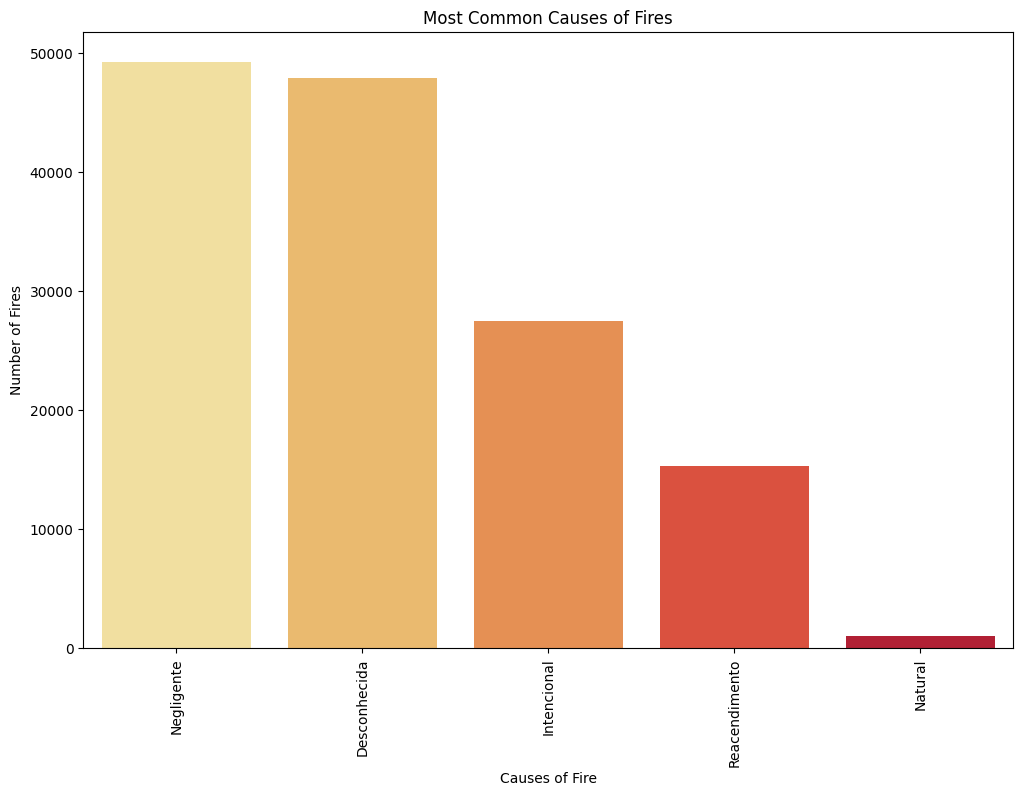

In [2]:
# Causes of fire occurrences
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the fire cause counts
fire_cause_counts = df['TipoCausa'].value_counts()

# Create a color palette from yellow to red
colors = sns.color_palette("YlOrRd",len(fire_cause_counts))

# Plot the most common causes of fires
plt.figure(figsize=(12, 8))
sns.barplot(x=fire_cause_counts.index, y=fire_cause_counts.values, palette=colors)
plt.xlabel('Causes of Fire')
plt.ylabel('Number of Fires')
plt.title('Most Common Causes of Fires')
plt.xticks(rotation=90)
plt.show()


Is there a variation in fire duration and occurrence based on different causes?

C:\Users\sofia\AppData\Local\Temp\ipykernel_19232\1613862213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TipoCausa', y='Duracao_Horas', data=df, palette='viridis')


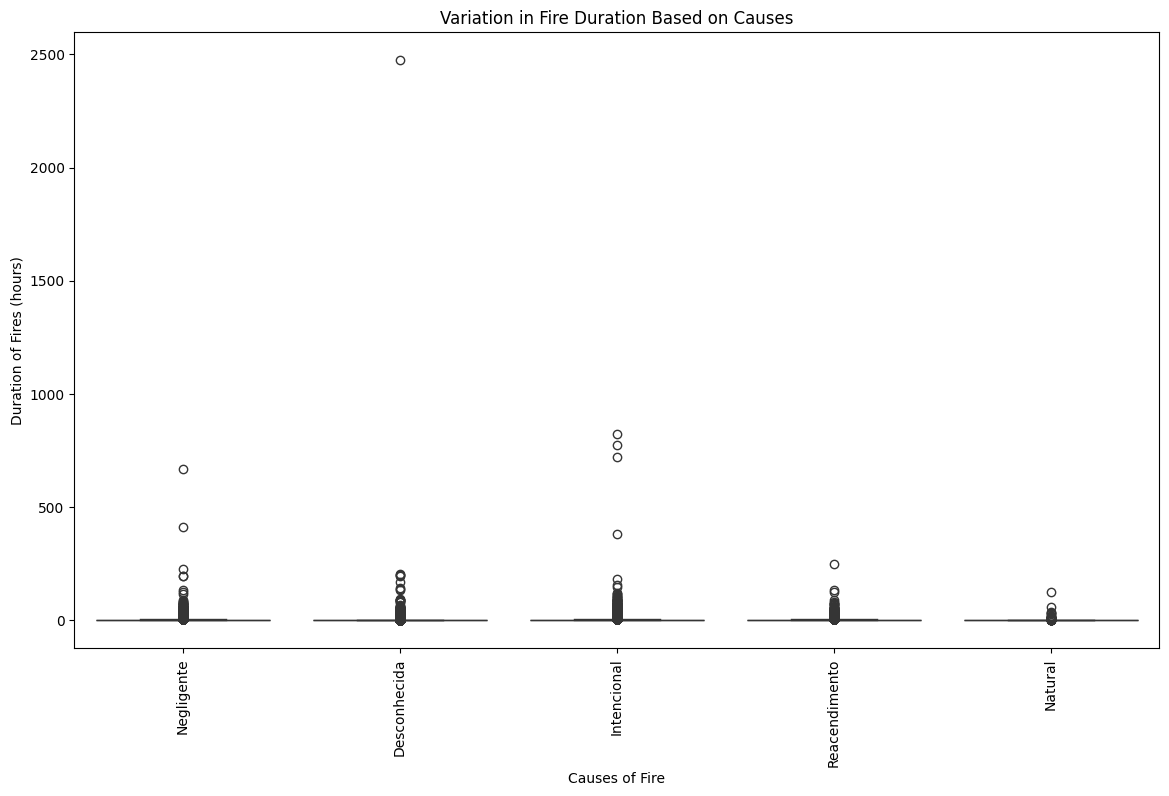

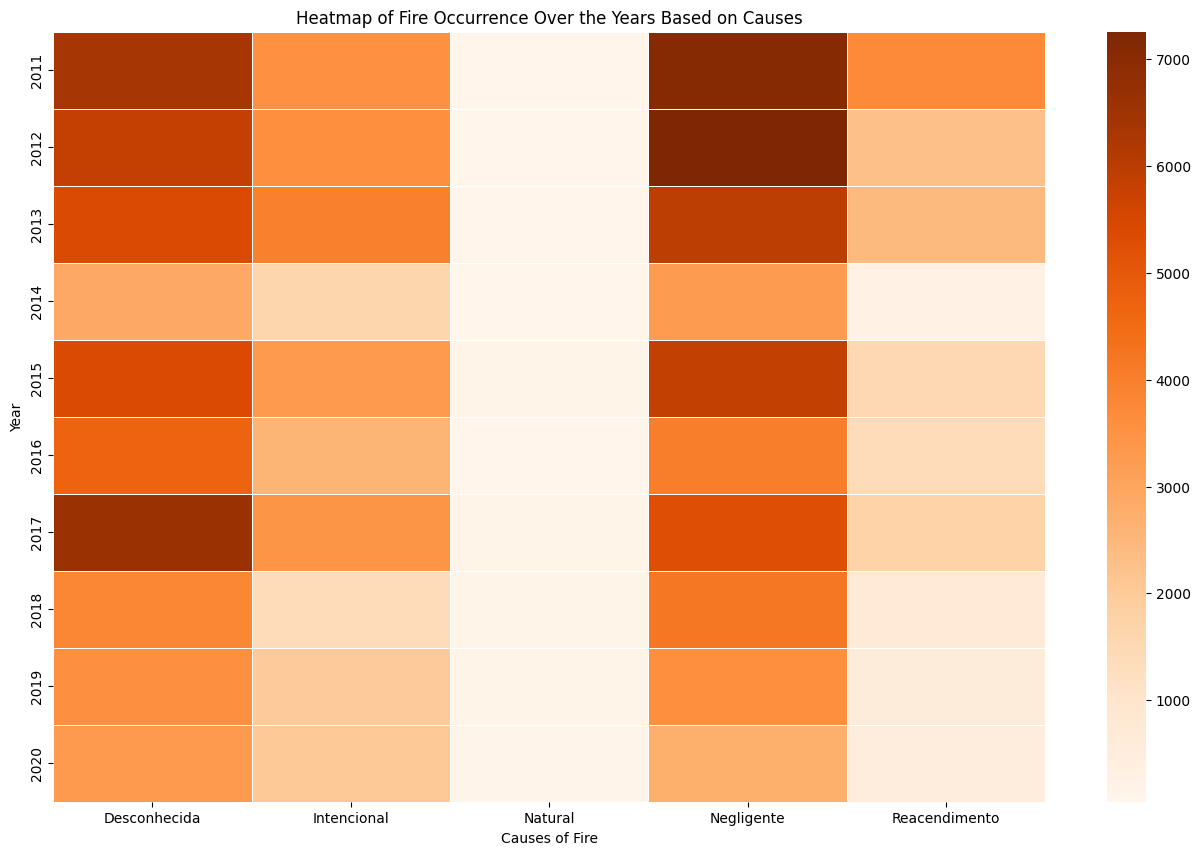

In [3]:
# Plot the duration of fires based on causes
plt.figure(figsize=(14, 8))
sns.boxplot(x='TipoCausa', y='Duracao_Horas', data=df, palette='viridis')
plt.xlabel('Causes of Fire')
plt.ylabel('Duration of Fires (hours)')
plt.title('Variation in Fire Duration Based on Causes')
plt.xticks(rotation=90)
plt.show()

df['DataHoraAlerta'] = pd.to_datetime(df['DataHoraAlerta'])
df['year'] = df['DataHoraAlerta'].dt.year

# Plot the occurrence of fires over the years based on causes
fire_occurrence_by_year = df.groupby(['year', 'TipoCausa']).size().unstack(fill_value=0)
plt.figure(figsize=(16, 10))
sns.heatmap(fire_occurrence_by_year, cmap='Oranges', linewidths=.5)
plt.xlabel('Causes of Fire')
plt.ylabel('Year')
plt.title('Heatmap of Fire Occurrence Over the Years Based on Causes')
plt.show()
